# Construct Optimal Portfolio: a Markowitz Portfolio Theory (MPT) Investigation

This notebook I conduct an in-depth investigation of the topic "how to construct optimal portfolio". One of the important scholars is Jon Markowtiz. In this survey, topics cover portfolios, portfolio allocation, and the Sharpe ratio. 

In particular, I investigate different angles of looking at investment especially investment in an index fund and the type of efficient portfolios that can be constructed. I lay out the road map and bring out a step-by-step analysis of how to determine the appropriate returns and volatilities associated with different types of portfolios.

For coding purpose, the steps of this python notebook are the following:
- Library Initiation
- Data Generation
- Markowitz Portfolio Optimization
- MPT Visualization
- Product Development

## Library Initiation

First we initiate the python notebook with libraries.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

Set starting date and ending date to download data

In [20]:
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2019-12-6')
tickers = ['aapl', 'csco']

Let us write a function to download data and then we can apply the function on the vector *tickers* which is an array of names of multiple stocks.

This can be considered a helper function that we need to use later on.

In [42]:
# Define function
def getDatafromYF(ticker, start_date, end_date):
    stockData = yf.download(ticker, start_date, end_date)
    return stockData
# End function

Let us try running *getDatafromYF()* function.

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-01-02  79.117142  79.285713  77.375717  78.432854  68.850548  140129500
2013-01-03  78.268570  78.524284  77.285713  77.442856  67.981491   88241300
2013-01-04  76.709999  76.947144  75.118568  75.285713  66.087891  148583400


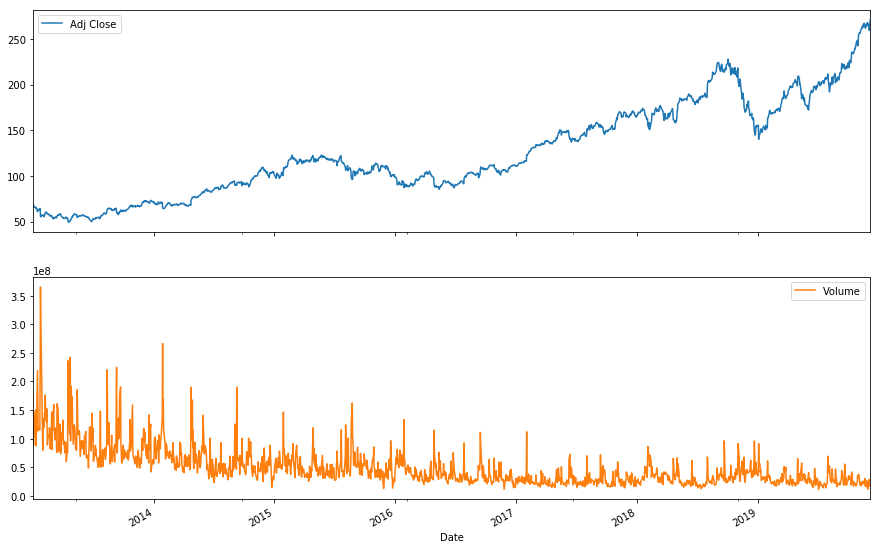

In [72]:
temp = getDatafromYF('aapl', start_date, end_date)
print(temp.head(3))
import matplotlib.pyplot as plt
tempForPlot = temp[['Adj Close', 'Volume']]
tempForPlot.plot(subplots=True, figsize=(15,10))
plt.legend(loc='best')
plt.show()


## Data Generation

Now let us apply this function on multiple stocks so that we can download them all at once.

In [45]:
# Start with Dictionary (this is where data is saved)
stockData = {}
for i in tickers:
    stockData[i] = pd.DataFrame(getDatafromYF(str(i), start_date, end_date))
    close = stockData[i]['Adj Close']
    stockData[i]['Normalize Return'] = close / close.shift() - 1    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [74]:
print(stockData['aapl'].head(3))
print(stockData['csco'].head(3))

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2013-01-02  79.117142  79.285713  77.375717  78.432854  68.850548  140129500   
2013-01-03  78.268570  78.524284  77.285713  77.442856  67.981491   88241300   
2013-01-04  76.709999  76.947144  75.118568  75.285713  66.087891  148583400   

            Normalize Return  
Date                          
2013-01-02               NaN  
2013-01-03         -0.012622  
2013-01-04         -0.027855  
                 Open   High        Low      Close  Adj Close    Volume  \
Date                                                                      
2013-01-02  20.120001  20.34  20.010000  20.340000  16.471840  40304500   
2013-01-03  20.459999  20.50  20.299999  20.450001  16.560923  50603500   
2013-01-04  20.410000  20.68  20.389999  20.480000  16.585213  36378900   

            Normalize Return  
Date                          
2013-0

Let us take a look at expected returns and risk for these candidates.

In [83]:
i = 0
print(
    'Normalize Return:', stockData[tickers[i]]['Normalize Return'], 
    '\n',
    'Expected Return:', np.mean(stockData[tickers[i]]['Normalize Return']),
    '\n',
    'Risk', np.std(stockData[tickers[i]]['Normalize Return']),
    '\n',
    'Sharpe Ratio:', np.mean(stockData[tickers[1]]['Normalize Return']) / np.std(stockData[tickers[0]]['Normalize Return']))

Normalize Return: Date
2013-01-02         NaN
2013-01-03   -0.012622
2013-01-04   -0.027855
2013-01-07   -0.005882
2013-01-08    0.002691
                ...   
2019-12-02   -0.011562
2019-12-03   -0.017830
2019-12-04    0.008826
2019-12-05    0.014671
2019-12-06    0.019316
Name: Normalize Return, Length: 1746, dtype: float64 
 Expected Return: 0.0009096389567263054 
 Risk 0.015757149080291244 
 Sharpe Ratio: 0.057728650791535975


Note that this is a large number! There are 250 trading days in a year and with an average return of 0.0091 daily this is $(1 + 0.00091)^{250} = 1.26$, a $26\%$ gain per year.

In [82]:
print((1 + 0.00091)**(250))
print((1 + 0.00091)**(250) - 1)

1.2553275697194364
0.2553275697194364


We can look at how these stocks in the list associate with each other. A standard procedure is to look at the covariance matrix.

In [143]:
retMatrix = pd.concat([stockData['aapl']['Normalize Return'], stockData['csco']['Normalize Return']], axis=1, join='inner')
print(retMatrix, '\n', retMatrix.corr(), '\n', retMatrix.cov())

            Normalize Return  Normalize Return
Date                                          
2013-01-02               NaN               NaN
2013-01-03         -0.012622          0.005408
2013-01-04         -0.027855          0.001467
2013-01-07         -0.005882         -0.009277
2013-01-08          0.002691          0.000986
...                      ...               ...
2019-12-02         -0.011562         -0.013463
2019-12-03         -0.017830         -0.009396
2019-12-04          0.008826         -0.008808
2019-12-05          0.014671         -0.008430
2019-12-06          0.019316          0.007353

[1746 rows x 2 columns] 
                   Normalize Return  Normalize Return
Normalize Return          1.000000          0.409108
Normalize Return          0.409108          1.000000 
                   Normalize Return  Normalize Return
Normalize Return          0.000248          0.000090
Normalize Return          0.000090          0.000196


## Markowitz Portfolio Optimization

According to Markowitz, investors should not put all their eggs in one basket. He raised an important concept and he was the first man who mathematically refurbished this concept in a theoretical manner. 

To replicate his work, let us start by setting up a vector of weights for all stocks in the *tickers* data.
- We set up $w_1$ for stock No. 1;
- We assume that two stocks sum up to $100\%$;
- The weight $w_2$ for the other stock would be complement of $w_1$. 

In [218]:
w1 = np.linspace(start=0, stop=1, num=50)
w2 = 1 - w1
r1 = np.mean(stockData[tickers[0]]['Normalize Return'])
r2 = np.mean(stockData[tickers[1]]['Normalize Return'])
sd1 = np.std(stockData[tickers[0]]['Normalize Return'])
sd2 = np.std(stockData[tickers[1]]['Normalize Return'])
rho = np.array(retMatrix.corr())[0][1]
print(w1, w2, r1, r2, sd1, sd2, rho)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ] [1.         0.97959184 0.95918367 0.93877551 0.91836735 0.89795918
 0.87755102 0.85714286 0.83673469 0.81632653 0.79591837 0.7755102
 0.75510204 0.73469388 0.71428571 0.69387755 0.67346939 0.65306122
 0.63265306 0.6122449  0.59183673 0.57142857 0.55102041 0.53061224
 0.51020408 0.48979592 0.46938776 0.44897959 0.42857143 0.40816327
 0.3877551  0.36734694 0.34693878 0.32653061 0.30612245 0.28571429
 0.26530612 0.24489796 0.2244898  0.2040

Let us compute return and risk for portfolios. Note that here we have multiple pairs of weights and for each pair there is a potential portfolio. We are going to plot all these portfolios in the same plot. By observing the Sharpe Ratio (reward and risk ratio), we are able to construct an efficient portfolio. Efficient portfolio is the most "optimal" portfolio because it has the highest Sharpe Ratio. This means that this portfolio has the highest reward per unit of risk out of all possible portfolios.

To execute this idea, the very first thing we need to do is to compute the risk and returns (reward) for each of the pair of $[w_1, w_2]$. Next, we can compute covariance matrix
$$\Sigma = 
\begin{bmatrix}
\sigma_1^2 & \sigma_{12} \\
\sigma_{21} & \sigma_2^2 \\
\end{bmatrix}
$$

The mathematical formula of the risks of the portfolio given
- weights: $w_1$ and $w_2$ for two stocks
- volatilities (measured by standard deviation of returns): $\sigma_1$ and $\sigma_2$ (in the script below it is called *sd1* and *sd2*)
- correlation between the returns of two stocks: $\rho$

and we can write out
$$(w_1\sigma_1 + w_2\sigma_2)^2 = w_1^2\sigma_1^2 + 2w_1\sigma_1w_2\sigma_2\rho + w_2^2\sigma_2^2$$

In [219]:
returnPath = np.zeros([1, len(w1)])
riskPath = np.zeros([1, len(w2)])
for i in range(len(w1)):
    returnPath[0][i] = w1[i] * r1 + w2[i] * r2
    riskPath[0][i] = w1[i]**2 * sd1**2 + w2[i]**2 * sd2**2 + 2*w1[i]*w2[i]*sd1*sd2*rho
print(
    'Returns:', returnPath,
    '\n',
    'Risks:', riskPath)

Returns: [[0.00065899 0.00066411 0.00066922 0.00067434 0.00067945 0.00068457
  0.00068968 0.0006948  0.00069991 0.00070503 0.00071015 0.00071526
  0.00072038 0.00072549 0.00073061 0.00073572 0.00074084 0.00074595
  0.00075107 0.00075618 0.0007613  0.00076641 0.00077153 0.00077664
  0.00078176 0.00078687 0.00079199 0.0007971  0.00080222 0.00080733
  0.00081245 0.00081757 0.00082268 0.0008278  0.00083291 0.00083803
  0.00084314 0.00084826 0.00085337 0.00085849 0.0008636  0.00086872
  0.00087383 0.00087895 0.00088406 0.00088918 0.00089429 0.00089941
  0.00090452 0.00090964]] 
 Risks: [[0.00019563 0.00019144 0.00018746 0.0001837  0.00018017 0.00017685
  0.00017375 0.00017088 0.00016822 0.00016578 0.00016356 0.00016156
  0.00015978 0.00015822 0.00015688 0.00015576 0.00015486 0.00015418
  0.00015372 0.00015347 0.00015345 0.00015365 0.00015406 0.0001547
  0.00015555 0.00015663 0.00015792 0.00015943 0.00016117 0.00016312
  0.00016529 0.00016769 0.0001703  0.00017313 0.00017618 0.00017945
  0.0

## MPT Visualization

Let us use *matplotlib* to plot what these potential candidate portfolios look like.

Text(0,0.5,'Expected Return')

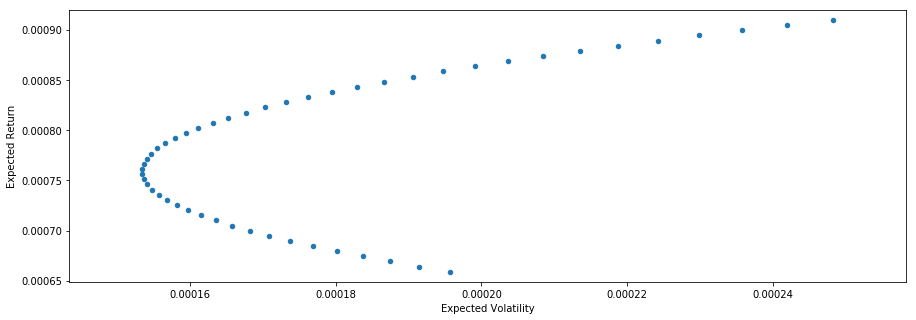

In [328]:
import matplotlib.pyplot as plt
marginsize = 1e-5
data_for_plot = pd.concat({'Return': pd.DataFrame(returnPath), 'Risk': pd.DataFrame(riskPath)}, axis=0).T
data_for_plot
data_for_plot.plot(x='Risk', y='Return', kind='scatter', figsize=(15,5))
#plt.plot(returnPath[0][idx], riskPath[0][idx], marker='o', markersize=5, color="green") # insert an additional dot: this is the position optimal portfolio
plt.xlim([np.min(riskPath) - marginsize, np.max(riskPath) + marginsize])
plt.ylim([np.min(returnPath) - marginsize, np.max(returnPath) + marginsize])
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [329]:
print(returnPath[0][idx], riskPath[0][idx])

0.0007817584746921985 0.000155551996265883


## Product Development

Now we can move to final phase: product development. Let us soft code a function to replicate everything above. This purpose of this task is to be able to pack everything together in one line of a code that can be called with a simple name with the capability to compute and run everything above.

In particular, we want a function with input:
- *tickers*: the list of names of stock tickers an investor likes
- *start_date*: starting date desired for data to be downloaded
- *end_date*: ending date desired for data to be downloaded

and the software package will output (in dictionary format):
- return matrix
- correlation matrix
- parameters used to construct the portfolios
- path of returns
- path of risks
- information about optimal portfolio

In [321]:
# Define function
def markowitzPortfolio(tickers, start_date, end_date):
    # Define function
    def getDatafromYF(ticker, start_date, end_date):
        stockData = yf.download(ticker, start_date, end_date)
        return stockData
    # End function

    # Start with Dictionary (this is where data is saved)
    stockData = {}
    for i in tickers:
        stockData[i] = pd.DataFrame(getDatafromYF(str(i), start_date, end_date))
        close = stockData[i]['Adj Close']
        stockData[i]['Normalize Return'] = close / close.shift() - 1

    # Verbose
    for i in range(len(tickers)):
        print(
            'Normalize Return:', stockData[tickers[i]]['Normalize Return'], 
            '\n',
            'Expected Return:', np.mean(stockData[tickers[i]]['Normalize Return']),
            '\n',
            'Risk', np.std(stockData[tickers[i]]['Normalize Return']),
            '\n',
            'Sharpe Ratio:', np.mean(stockData[tickers[1]]['Normalize Return']) / np.std(stockData[tickers[0]]['Normalize Return']))
    retMatrix = pd.concat([stockData[tickers[0]]['Normalize Return'], stockData[tickers[1]]['Normalize Return']], axis=1, join='inner')

    # Compute the following for Markowitz Portfolio
    w1 = np.linspace(start=0, stop=1, num=50)
    w2 = 1 - w1
    r1 = np.mean(stockData[tickers[0]]['Normalize Return'])
    r2 = np.mean(stockData[tickers[1]]['Normalize Return'])
    sd1 = np.std(stockData[tickers[0]]['Normalize Return'])
    sd2 = np.std(stockData[tickers[1]]['Normalize Return'])
    rho = np.array(retMatrix.corr())[0][1]

    # Compute paths for returns and risks
    returnPath = np.zeros([1, len(w1)])
    riskPath = np.zeros([1, len(w2)])
    for i in range(len(w1)):
        returnPath[0][i] = w1[i] * r1 + w2[i] * r2
        riskPath[0][i] = w1[i]**2 * sd1**2 + w2[i]**2 * sd2**2 + 2*w1[i]*w2[i]*sd1*sd2*rho
        
    # Optimal Portfolio
    maximumSR = testresult['Return Path'] / testresult['Risk Path']
    maxVal = maximumSR.max()
    for i in range(len(maximumSR[0])):
        if maximumSR[0][i] == maxVal:
            idx = i

    # Visualization
    import matplotlib.pyplot as plt
    marginsize = 1e-5
    data_for_plot = pd.concat({'Return': pd.DataFrame(returnPath), 'Risk': pd.DataFrame(riskPath)}, axis=0).T
    data_for_plot
    data_for_plot.plot(x='Risk', y='Return', kind='scatter', figsize=(15,5))
    
    plt.xlim([np.min(riskPath) - marginsize, np.max(riskPath) + marginsize])
    plt.ylim([np.min(returnPath) - marginsize, np.max(returnPath) + marginsize])
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')

    # Output
    return {'Return Matrix': retMatrix, 
            'Correlation Matrix': retMatrix.corr(), 
            'Covariance Matrix': retMatrix.cov(), 
            'Parameters': [w1, w2, r1, r2, sd1, sd2, rho], 
            'Return Path': returnPath, 
            'Risk Path': riskPath,
            'Optimal Portfolio': {
                'Optimal Weight': [w1[idx], w2[idx]], 
                'Optimal Return': w1[idx] * r1 + w2[idx] * r2, 
                'Optimal Volatility': w1[idx]**2 * sd1**2 + w2[idx]**2 * sd2**2 + 2*w1[idx]*w2[idx]*sd1*sd2*rho,
                'Optimal SR': (w1[idx] * r1 + w2[idx] * r2) / (w1[idx]**2 * sd1**2 + w2[idx]**2 * sd2**2 + 2*w1[idx]*w2[idx]*sd1*sd2*rho)
            }}
# End of function


Let us try it now!

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Normalize Return: Date
2013-01-02         NaN
2013-01-03   -0.012622
2013-01-04   -0.027855
2013-01-07   -0.005882
2013-01-08    0.002691
                ...   
2019-12-02   -0.011562
2019-12-03   -0.017830
2019-12-04    0.008826
2019-12-05    0.014671
2019-12-06    0.019316
Name: Normalize Return, Length: 1746, dtype: float64 
 Expected Return: 0.0009096389567263054 
 Risk 0.015757149080291244 
 Sharpe Ratio: 0.08487389341522517
Normalize Return: Date
2013-01-02         NaN
2013-01-03   -0.008214
2013-01-04    0.035650
2013-01-07    0.022949
2013-01-08   -0.012237
                ...   
2019-12-02   -0.009621
2019-12-03   -0.004407
2019-12-04   -0.000553
2019-12-05    0.003271
2019-12-06    0.008477
Name: Normalize Return, Length: 1746, dtype: float64 
 Expected Return: 0.0013373705915684523 
 Risk 0.02052797786789395 
 Sharpe Ratio: 0.0848738934152

IndexError: index 29 is out of bounds for axis 0 with size 1

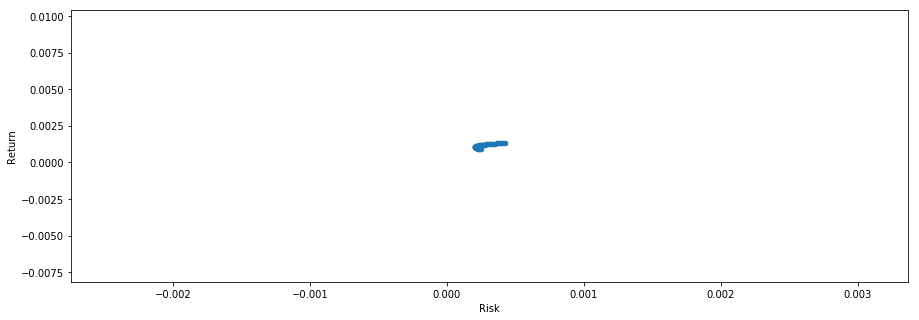

In [322]:
# Input
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2019-12-6')
tickers = ['aapl', 'fb']

# Run
testresult = markowitzPortfolio(tickers, start_date, end_date)

In [318]:
print('Expected returns for all portfolios:', testresult['Return Path'])

Expected returns for all portfolios: [[0.00133737 0.00132864 0.00131991 0.00131118 0.00130245 0.00129372
  0.001285   0.00127627 0.00126754 0.00125881 0.00125008 0.00124135
  0.00123262 0.00122389 0.00121516 0.00120643 0.0011977  0.00118897
  0.00118024 0.00117152 0.00116279 0.00115406 0.00114533 0.0011366
  0.00112787 0.00111914 0.00111041 0.00110168 0.00109295 0.00108422
  0.00107549 0.00106676 0.00105804 0.00104931 0.00104058 0.00103185
  0.00102312 0.00101439 0.00100566 0.00099693 0.0009882  0.00097947
  0.00097074 0.00096201 0.00095329 0.00094456 0.00093583 0.0009271
  0.00091837 0.00090964]]


In [319]:
print('Volatilities for all portfolios:', testresult['Risk Path'])

Volatilities for all portfolios: [[0.0004214  0.0004089  0.00039678 0.00038503 0.00037365 0.00036265
  0.00035202 0.00034177 0.00033189 0.00032238 0.00031324 0.00030448
  0.0002961  0.00028808 0.00028044 0.00027317 0.00026628 0.00025976
  0.00025361 0.00024784 0.00024244 0.00023741 0.00023276 0.00022848
  0.00022457 0.00022104 0.00021788 0.00021509 0.00021268 0.00021064
  0.00020898 0.00020768 0.00020676 0.00020622 0.00020605 0.00020625
  0.00020683 0.00020777 0.0002091  0.00021079 0.00021286 0.0002153
  0.00021812 0.00022131 0.00022487 0.00022881 0.00023312 0.0002378
  0.00024286 0.00024829]]


In [320]:
print('Optimal Portfolio has the following information', testresult['Optimal Portfolio'])

Optimal Portfolio has the following information {'Optimal Weight': [0.4897959183673469, 0.5102040816326531], 'Optimal Return': 0.0011278693826661762, 'Optimal Volatility': 0.0002245709194873045, 'Optimal SR': 5.02233051920125}
